📁 Upload your dataset file


Saving nba_traditional_stats_2024_2025.csv to nba_traditional_stats_2024_2025 (1).csv


/tmp/ipython-input-4-1631776599.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='PTS', y='PLAYER', data=evsc_top.head(10), palette='viridis')


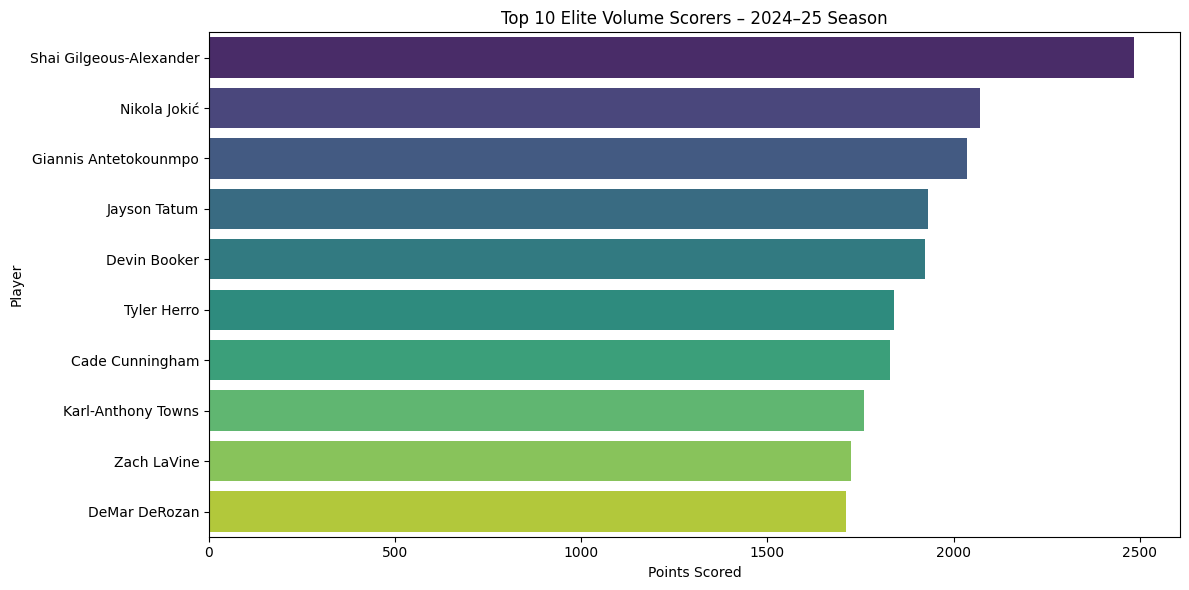

In [4]:
# 📦 Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files  # Skip this if not on Colab

# 📂 Step 2: Upload CSV
print("📁 Upload your dataset file")
uploaded = files.upload()
filename = list(uploaded.keys())[0]

# 📥 Step 3: Load Data
df = pd.read_csv(filename)

# 🔍 Step 4: Apply EVSC Filters
df_evsc = df[
    (df['PTS'] > 1000) &
    ((df['FGA'] + df['FTA']) > 950) &
    (df['FG_PCT'] >= 0.45) &
    (df['GP'] >= 50) &
    (df['MIN'] >= 1500)
]

# 🧮 Step 5: Select and Sort Relevant Columns
evsc_top = df_evsc[[
    'PLAYER', 'TEAM', 'GP', 'MIN', 'PTS', 'FGA', 'FTA', 'FG_PCT',
    'FG3M', 'FT_PCT', 'AST', 'TOV', 'EFF'
]].sort_values(by='PTS', ascending=False).reset_index(drop=True)

# 💾 Step 6: Save and Preview
evsc_top.to_csv("elite_volume_scorers_2024_25.csv", index=False)
evsc_top.head(10)  # Display top 10

# 📊 Step 7: Plot Top 10 Scorers
plt.figure(figsize=(12, 6))
sns.barplot(x='PTS', y='PLAYER', data=evsc_top.head(10), palette='viridis')
plt.title("Top 10 Elite Volume Scorers – 2024–25 Season")
plt.xlabel("Points Scored")
plt.ylabel("Player")
plt.tight_layout()
plt.savefig("evsc_top10_plot.jpg", dpi=300)
plt.show()
